In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [2]:
df = pd.read_excel("C:/Users/sharm/Downloads/agile_capital_sentiment_data.xlsx")

In [3]:
df

,Review,Polarity,Predicted_Sentiment
0,Good returns on my investments this quarter.,0.700000,Positive
1,I'm happy with the transparency and advice.,0.800000,Positive
2,I feel the reports lacked depth and clarity.,0.000000,Neutral
3,Customer support was quick and efficient.,0.333333,Positive
4,I'm happy with the transparency and advice.,0.800000,Positive
...,...,...,...
195,"Great campaign, very informative content.",0.500000,Positive
196,The investment advice was excellent and very h...,0.600000,Positive
197,The campaign information was standard.,0.000000,Neutral
198,Good returns on my investments this quarter.,0.700000,Positive


In [12]:
print(df.shape)
print(df.columns)
df.head()

(200, 4)
Index(['Review', 'Polarity', 'Predicted_Sentiment', 'Sentiment'], dtype='object')


,Review,Polarity,Predicted_Sentiment,Sentiment
0,Good returns on my investments this quarter.,0.700000,Positive,Positive
1,I'm happy with the transparency and advice.,0.800000,Positive,Positive
2,I feel the reports lacked depth and clarity.,0.000000,Neutral,Negative
3,Customer support was quick and efficient.,0.333333,Positive,Positive
4,I'm happy with the transparency and advice.,0.800000,Positive,Positive


In [13]:
df.isnull().sum()
df.dropna(subset=['Review'], inplace=True)

In [14]:
df['Review'] = df['Review'].astype(str)

In [15]:
df

,Review,Polarity,Predicted_Sentiment,Sentiment
0,Good returns on my investments this quarter.,0.700000,Positive,Positive
1,I'm happy with the transparency and advice.,0.800000,Positive,Positive
2,I feel the reports lacked depth and clarity.,0.000000,Neutral,Negative
3,Customer support was quick and efficient.,0.333333,Positive,Positive
4,I'm happy with the transparency and advice.,0.800000,Positive,Positive
...,...,...,...,...
195,"Great campaign, very informative content.",0.500000,Positive,Positive
196,The investment advice was excellent and very h...,0.600000,Positive,Positive
197,The campaign information was standard.,0.000000,Neutral,Negative
198,Good returns on my investments this quarter.,0.700000,Positive,Positive


In [16]:
#for polarity and subjectivity
df['TB_Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['TB_Subjectivity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

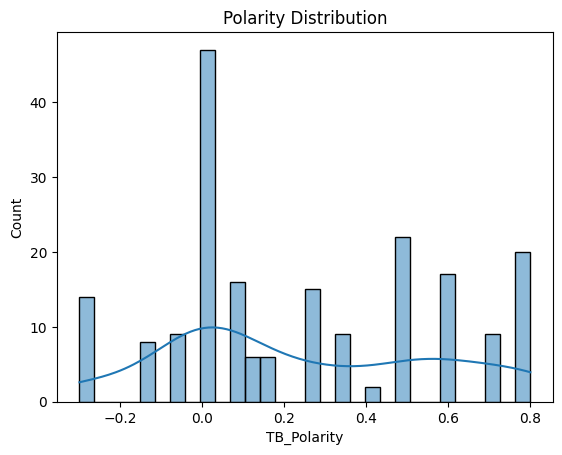

In [17]:
#EXPLORATORY DATA ANALYTICS 
#histogram
sns.histplot(df['TB_Polarity'], bins=30, kde=True)
plt.title("Polarity Distribution")
plt.show()

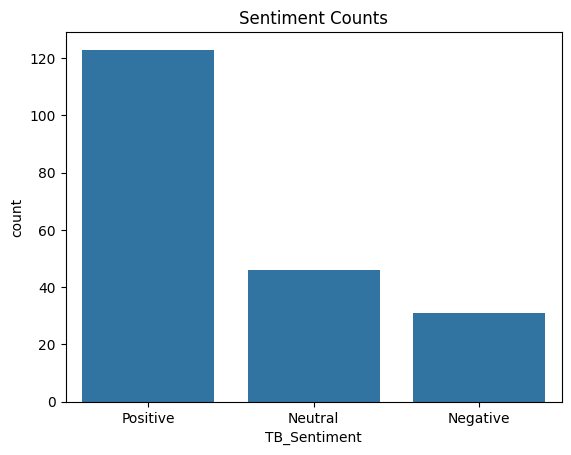

In [18]:
#countplot
df['TB_Sentiment'] = df['TB_Polarity'].apply(lambda x: 'Positive' if x>0 
                                             else ('Negative' if x<0 else 'Neutral'))
sns.countplot(x='TB_Sentiment', data=df)
plt.title("Sentiment Counts")
plt.show()

              precision    recall  f1-score   support

    Negative       0.71      1.00      0.83        22
     Neutral       1.00      0.64      0.78        72
    Positive       0.86      1.00      0.93       106

    accuracy                           0.87       200
   macro avg       0.86      0.88      0.85       200
weighted avg       0.89      0.87      0.86       200



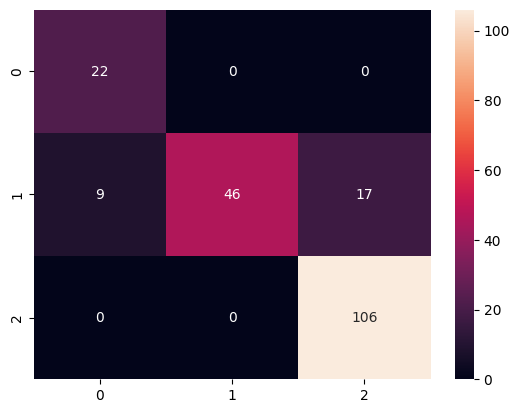

In [20]:
#heatmap of predicted_sentiments
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(df['Predicted_Sentiment'], df['TB_Sentiment']))
sns.heatmap(confusion_matrix(df['Predicted_Sentiment'], df['TB_Sentiment']), annot=True, fmt="d")
plt.show()

In [21]:
#machine learning model for accuracy:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df['Review']
y = df['Predicted_Sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 1.0
